# Evaluation report for classification

## 본 문서에서는 sample notebook을 이용한 학습/추론 결과에 대한 상세한 평가 결과를 확인할 수 있습니다.

### 지원 기능

- 수치형/계열형 항목에 대한 통계량 조사
- 결손치 시각화 그래프
- 분류 유형 분포 그래프
- 분류 유형에 따른 두 수치형 변수 간 관계 그래프(pairplot)
- 분류 유형에 따른 수치형 단일 변수에 대한 분포 그래프(boxplot)
- 분류 유형 별 성능(confusion matrix, classification report)
- 분류 유형 별 모델의 확신도(확률) 그래프
- 분류 유형 별 input 변수 중요도(shapley value) 그래프

In [1]:
from wrapping import EvaluationReport

report = EvaluationReport()

report.load_data()

['train_0', 'train_1', 'train_2', 'train_3', 'inference_0', 'inference_1', 'inference_2'] are loaded


# Train pipeline

## input asset
----

In [2]:
p_step = 'train_0'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [3]:
# 수치형 인자의 경우 직접 입력해주세요.(추후 preprocess 고도화로 자동화 기능 지원 예정)
nx_columns = args['x_columns']
x_columns = args['x_columns']
y_column = args['y_column']

### input tabular data의 통계량 조사

In [4]:
train_descrive = report.describe()
train_descrive

,input_x0,input_x1,input_x2,input_x3,target
count,147.0,147.0,147.0,147.0,147
unique,-,-,-,-,3
top,-,-,-,-,setosa
freq,-,-,-,-,50
mean,5.836054,3.055782,3.727891,1.182313,-
std,0.834196,0.439353,1.770411,0.75993,-
min,4.3,2.0,1.0,0.1,-
25%,5.1,2.8,1.55,0.3,-
50%,5.8,3.0,4.3,1.3,-
75%,6.4,3.3,5.1,1.8,-


### input tabular data의 결손치

- 가로축은 항목, 세로축은 데이터 순번(index)입니다.
- 결손치가 있는 경우 흰 색으로 줄이 그어집니다.

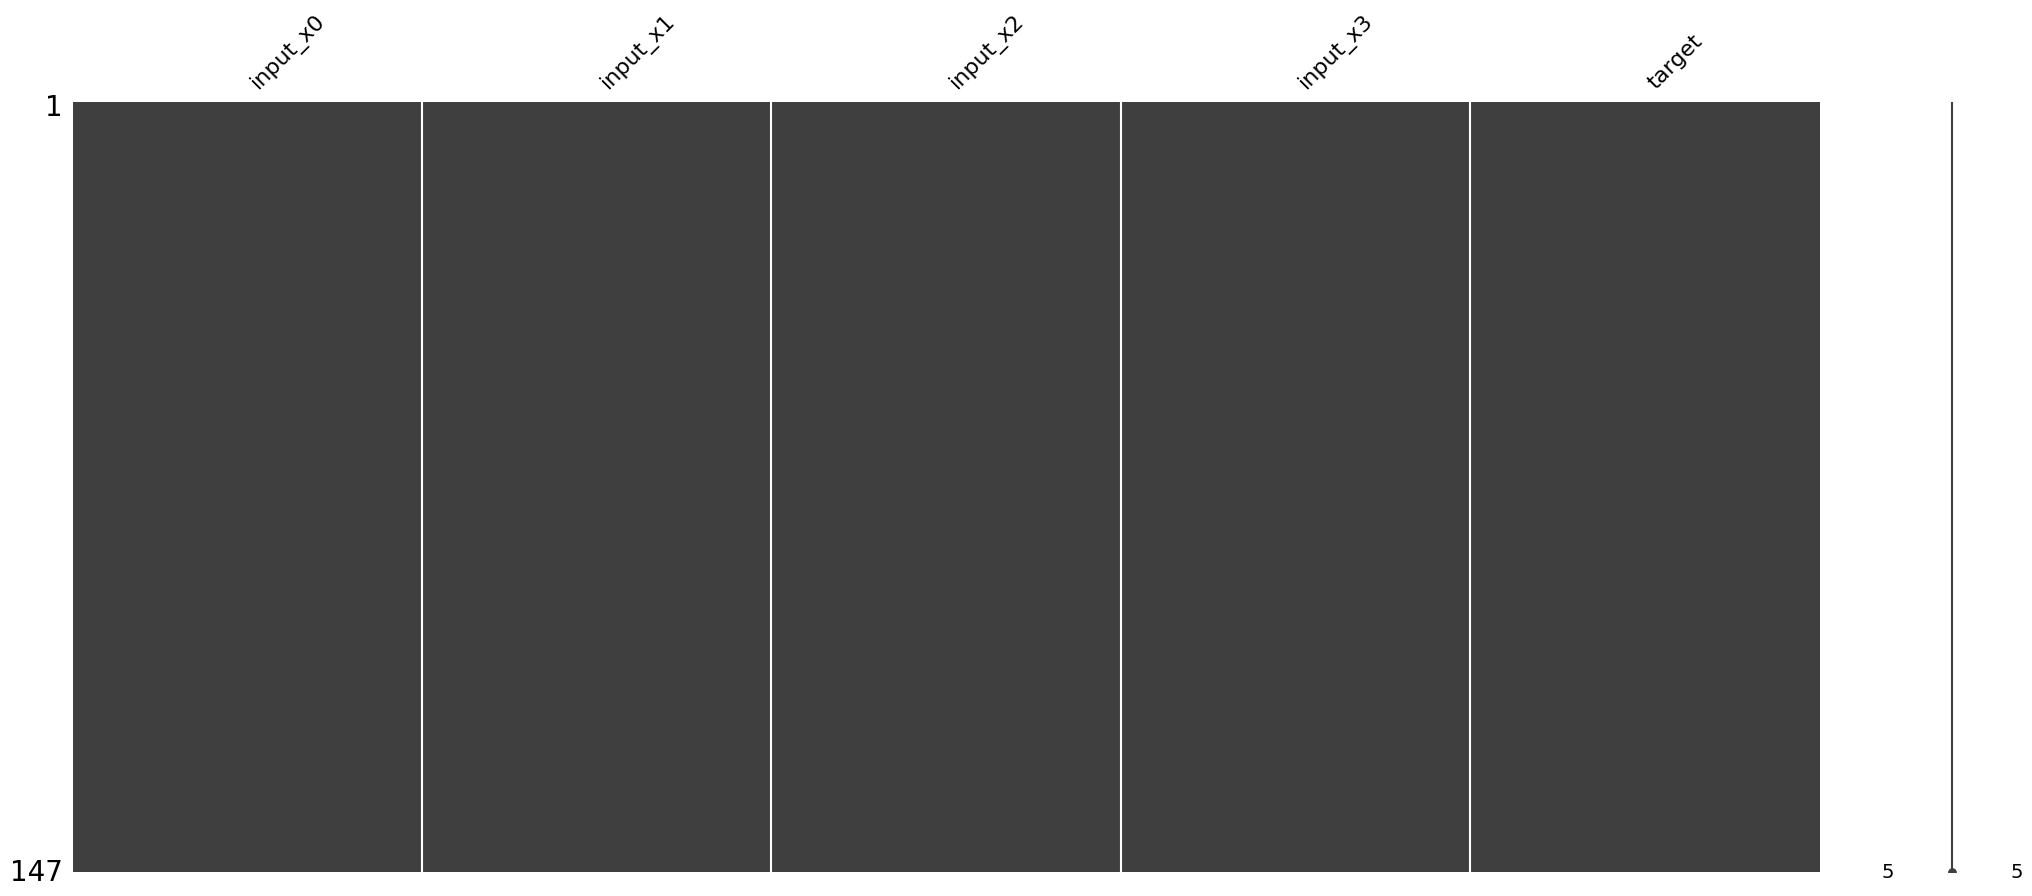

In [5]:
report.viz_missing()

### input tabular data의 분류 유형 분포

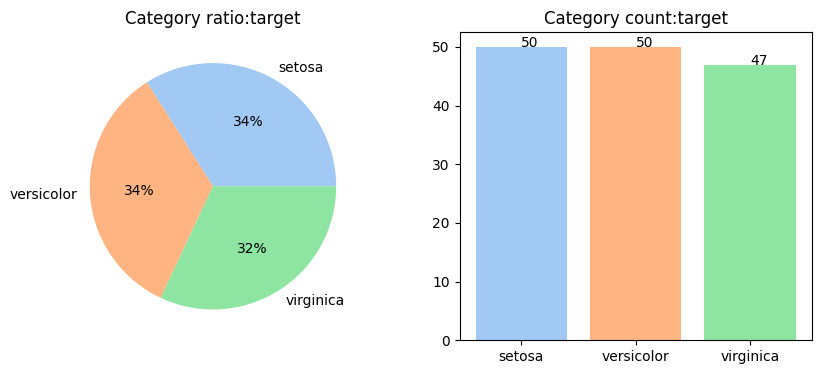

In [6]:
report.viz_class_distribution()

### input data의 수치형 항목에 대한 pairplot

- 분류 유형(색)에 따라 두 가지 수치형 항목에 대한 분포를 확인할 수 있습니다.

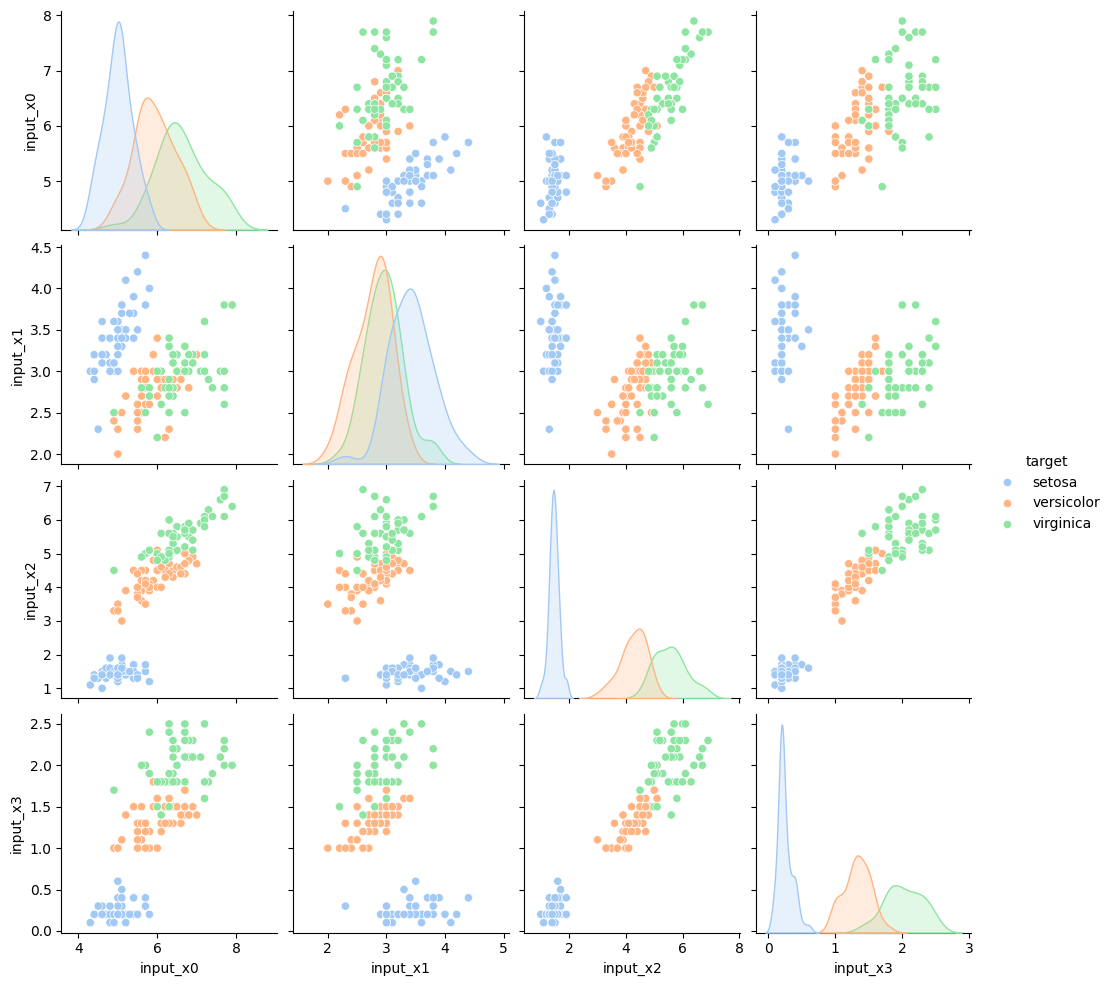

In [7]:
report.viz_pairplot()

### input tabular data의 수치형 데이터에 대한 boxplot

- 분류 유형(색)에 따라 수치형 데이터에 대한 분포를 boxplot 형태로 확인할 수 있습니다.
- 상단선은 최대값, 하단선은 최소값을 나타내며 중앙선은 중앙값을 나타냅니다.
- 상하단에서 벗어난 원형 데이터포인트는 정상분포를 가정할 때 이상치의 가능성이 있는 데이터입니다.
- 데이터 분포가 정상분포가 아닌 경우 이상치가 아니기 때문에 유의하여주시기 바랍니다.

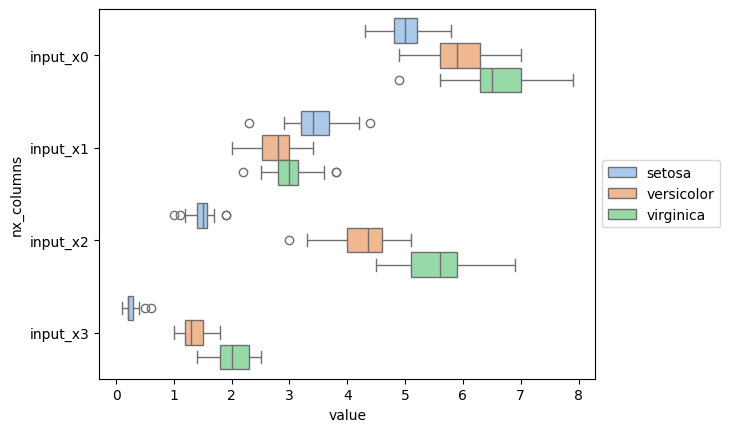

In [8]:
report.create_dataframe_viz()
report.viz_boxplot()

## preprocess asset
----

In [9]:
p_step = 'train_1'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [10]:
px_columns = config['x_columns']
py_column = config['y_column']

In [11]:
args

{'handling_encoding_y_column': 'target',
 'handling_encoding_y': 'label',
 'handling_missing': 'dropna',
 'handling_scaling_x': 'none',
 'drop_duplicate_time': True,
 'load_train_preprocess': False}

In [12]:
print(df.shape)
df.head()

(147, 11)


,input_x0,input_x1,input_x2,input_x3,target,target_encoded,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,target_encoded_nan
0,5.1,3.5,1.4,0.2,setosa,0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,setosa,0,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,setosa,0,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,setosa,0,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,setosa,0,5.0,3.6,1.4,0.2,0


### 전처리 이후 data의 통계량 변화

In [13]:
report.describe(px_columns, py_column)

,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,target_encoded_nan
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.836054,3.055782,3.727891,1.182313,0.979592
std,0.834196,0.439353,1.770411,0.759930,0.814840
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.550000,0.300000,0.000000
50%,5.800000,3.000000,4.300000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### 전처리 이후 data의 분류 유형 분포

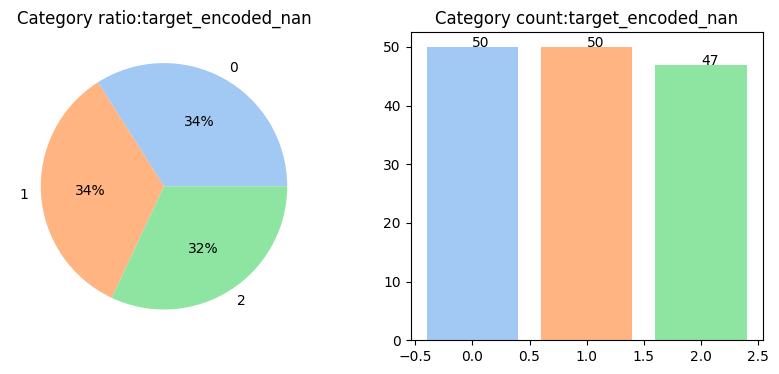

In [14]:
report.viz_class_distribution(py_column)

### 전처리 이후 data의 수치형 항목에 대한 pairplot

In [15]:
# 비교를 위해 전처리 전 pairplot 결과(확인을 위해서는 하단 # 부분을 삭제해주세요.)
# report.viz_pairplot(nx_columns, y_column)

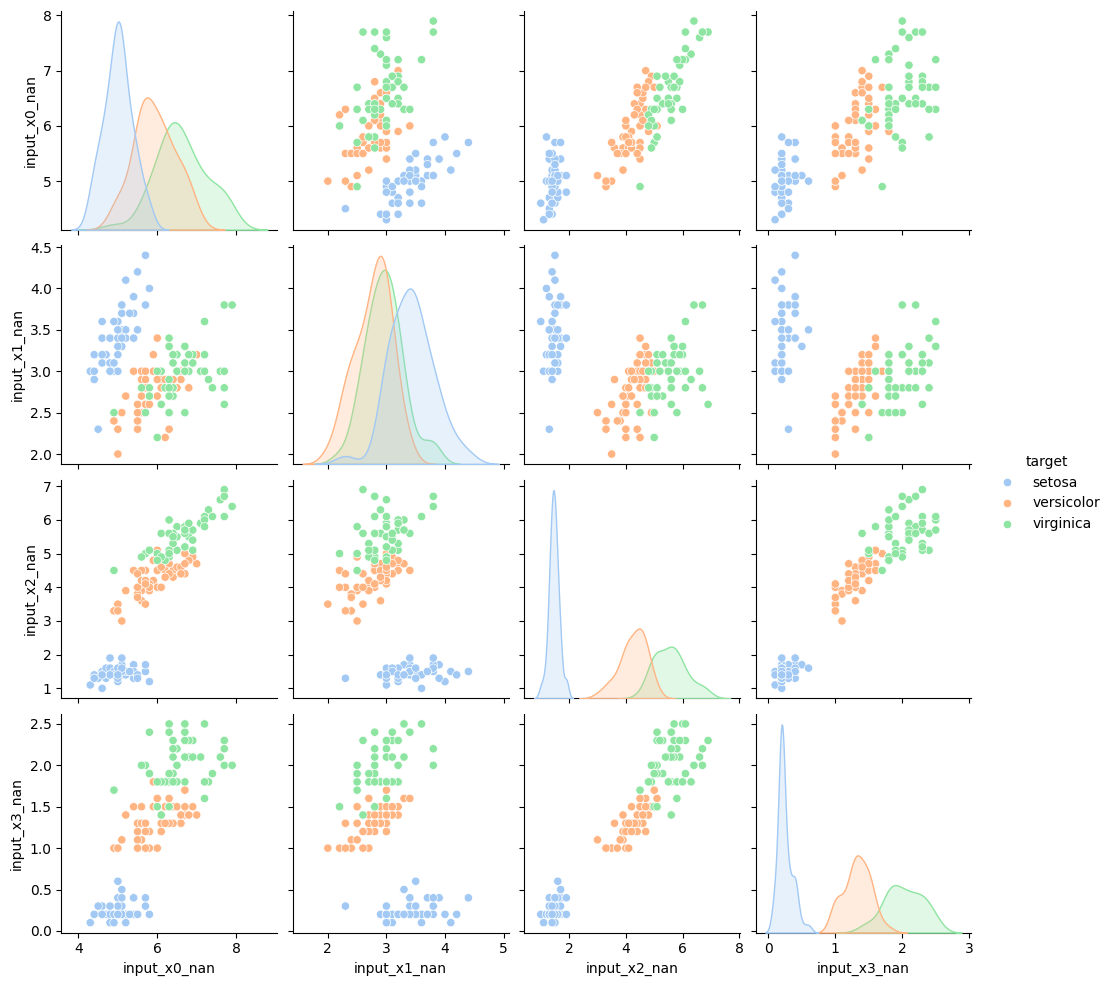

In [16]:
report.viz_pairplot(px_columns, y_column)

### 전처리 이후 data의 수치형 데이터에 대한 boxplot

In [17]:
# 확인용 전처리 전 boxplot 결과(확인을 위해서는 하단 # 부분을 삭제해주세요.)
# report.create_dataframe_viz(nx_columns, [y_column])
# report.viz_boxplot(y_column)

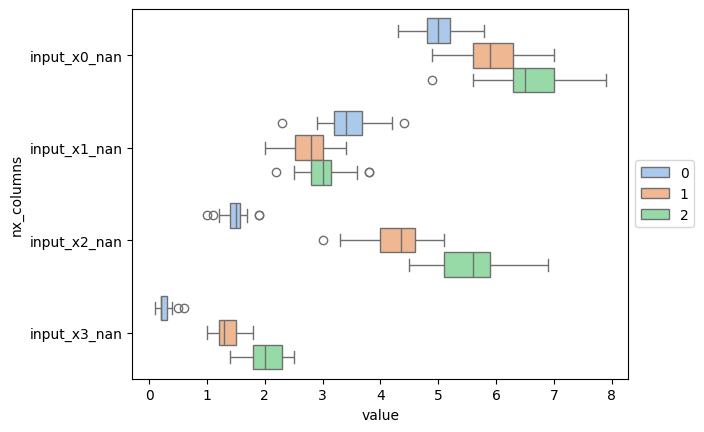

In [18]:
report.create_dataframe_viz(px_columns, [py_column])
report.viz_boxplot(py_column)

## sampling asset
----

In [19]:
p_step = 'train_2'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [20]:
args

{'sampling_type': 'none',
 'sampling_method': 'random',
 'label_sampling': False,
 'ignore_label_class': None,
 'negative_target_class': None,
 'label_sampling_num_type': None,
 'label_sampling_num': None,
 'sampling_groupkey_columns': None,
 'sampling_num_type': 'ratio',
 'sampling_num': 0.8}

### sampling 이후 data의 통계량 변화

In [21]:
if args['sampling_type'] != 'none':
    report.describe(px_columns, py_column)

### sampling 이후 data의 분류 유형 분포

In [22]:
if args['sampling_type'] != 'none':
    report.viz_class_distribution(py_column)

### sampling 이후 data의 수치형 항목에 대한 pairplot

In [23]:
if args['sampling_type'] != 'none':
    report.viz_pairplot(px_columns, y_column)

### sampling 이후 data의 수치형 데이터에 대한 boxplot

In [24]:
if args['sampling_type'] != 'none':
    report.create_dataframe_viz(px_columns, [py_column])
    report.viz_boxplot(y_column)

## TCR asset
----

In [25]:
p_step = 'train_3'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [26]:
y_pred_column = 'pred_'+config['y_column']

In [27]:
args

{'model_type': 'classification',
 'data_split_method': 'cross_validate',
 'evaluation_metric': 'accuracy',
 'model_list': ['lgb', 'rf', 'cb'],
 'num_hpo': 3,
 'param_range': {'rf': {'max_depth': 6, 'n_estimators': [300, 500]},
  'gbm': {'max_depth': [5, 7], 'n_estimators': [300, 500]},
  'ngb': {'col_sample': [0.6, 0.8], 'n_estimators': [100, 300]},
  'lgb': {'max_depth': [5, 9], 'n_estimators': [300, 500]},
  'cb': {'max_depth': [5, 9], 'n_estimators': [100, 500]}},
 'shap_ratio': 1.0}

### 분류 유형 별 성능 확인

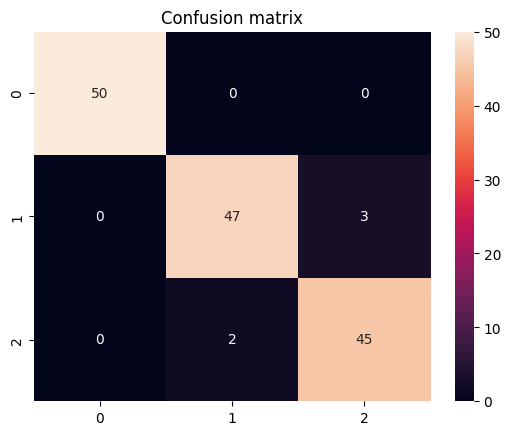

In [28]:
report.viz_confusion_matrix()

In [29]:
report.classification_report()

Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        47

    accuracy                           0.97       147
   macro avg       0.97      0.97      0.97       147
weighted avg       0.97      0.97      0.97       147



### 분류 유형 별 최대 확률 확인

- 분류 유형 별 확률을 확인하여 모델이 얼마나 해당 데이터에 대해 확신을 가지고 분류했는지 알 수 있습니다.

In [30]:
# k_fold_split option으로 교차검증 과정에서 각 fold 별 확률을 확인할 수 있습니다.
# 확인을 위해서는 # 를 삭제 후 실행해주세요.
# df = report.viz_probability(k_fold_split=True)

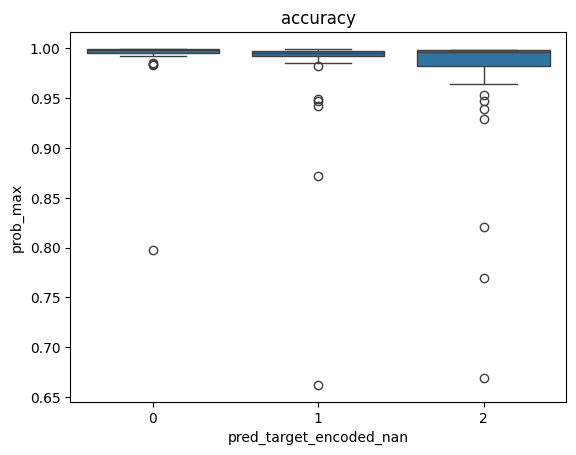

In [31]:
df = report.viz_probability(k_fold_split=False)

### 불확실한 데이터 확인

In [32]:
df.sort_values('prob_max').head(10)

,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,target_encoded_nan,pred_target_encoded_nan,pred_target_encoded_nan_best0,pred_target_encoded_nan_best1,pred_target_encoded_nan_best2,prob_0,prob_1,prob_2,train_test,prob_max
144,6.3,2.5,4.9,1.5,-0.685255,-0.562388,-0.823123,-0.710576,1,1,1,2,2,0.016743,0.662394,0.320862,2th_test,0.662394
138,6.1,2.6,5.6,1.4,-0.519231,-0.507453,-0.939182,-0.272989,2,2,2,2,2,0.033590,0.297037,0.669372,2th_test,0.669372
140,7.2,3.0,5.8,1.6,-0.670103,-0.207811,-1.071267,-0.569546,2,2,2,1,1,0.018045,0.211997,0.769958,1th_test,0.769958
99,4.5,2.3,1.3,0.3,1.090571,-1.392944,1.146732,1.721055,0,0,0,0,0,0.797370,0.187545,0.015085,2th_test,0.797370
142,6.3,2.8,5.1,1.5,-0.744483,-0.323471,-1.195191,-0.534135,2,2,2,2,2,0.018774,0.160297,0.820929,3th_test,0.820929
55,6.0,2.2,5.0,1.5,-0.466546,-0.367015,-0.751725,-0.684792,2,1,1,1,1,0.022806,0.871760,0.105434,0th_test,0.871760
111,5.9,3.2,4.8,1.8,-0.187001,0.376679,-0.709050,-1.866671,1,2,2,2,2,0.022561,0.048204,0.929236,0th_test,0.929236
33,6.0,3.0,4.8,1.8,-0.458885,-0.244139,-0.607744,-1.365050,2,2,2,2,2,0.019848,0.041200,0.938952,0th_test,0.938952
101,6.9,3.1,4.9,1.5,-0.902638,0.116448,-1.095880,-0.713735,1,1,1,1,1,0.013098,0.941718,0.045183,3th_test,0.941718
108,6.2,2.8,4.8,1.8,-0.562218,-0.302795,-0.554912,-1.231231,2,2,2,2,2,0.010315,0.042896,0.946788,1th_test,0.946788


In [33]:
shap_cols = (df.columns[df.columns.str.contains('_shapley')]).tolist()

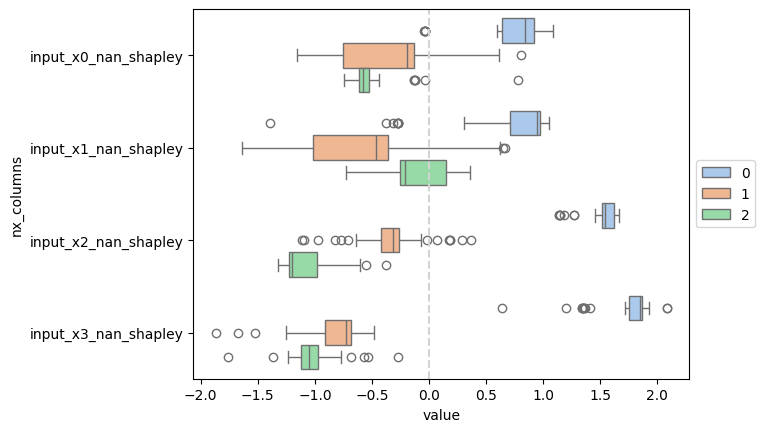

In [34]:
report.create_dataframe_viz(shap_cols, [config['y_column']])
report.viz_boxplot(cat_col=config['y_column'], vline=0)

# Inference pipeline

## input asset
----

In [35]:
p_step = 'inference_0'
data, args, config = report.set_data(p_step)
df = data['dataframe']

### input tabular data의 통계량 조사

In [36]:
report.describe()

train                                       inference            \
        input_x0  input_x1  input_x2  input_x3  target  input_x0  input_x1   
count      147.0     147.0     147.0     147.0     147       3.0       3.0   
unique         -         -         -         -       3         -         -   
top            -         -         -         -  setosa         -         -   
freq           -         -         -         -      50         -         -   
mean    5.836054  3.055782  3.727891  1.182313       -       6.2  3.133333   
std     0.834196  0.439353  1.770411   0.75993       -       0.3   0.23094   
min          4.3       2.0       1.0       0.1       -       5.9       3.0   
25%          5.1       2.8      1.55       0.3       -      6.05       3.0   
50%          5.8       3.0       4.3       1.3       -       6.2       3.0   
75%          6.4       3.3       5.1       1.8       -      6.35       3.2   
max          7.9       4.4       6.9       2.5       -       6.5       3.4   

                                       
        input_x2  input_x3     target  
count        3.0       3.0          3  
unique         -         -          1  
top            -         -  virginica  
freq           -         -          3  
mean    5.233333  2.033333          -  
std     0.152753  0.251661          -  
min          5.1       1.8          -  
25%         5.15       1.9          -  
50%          5.2       2.0          -  
75%          5.3      2.15          -  
max          5.4       2.3          -

### input tabular data의 결손치

- 가로축은 항목, 세로축은 데이터 순번(index)입니다.
- 결손치가 있는 경우 흰 색으로 줄이 그어집니다.

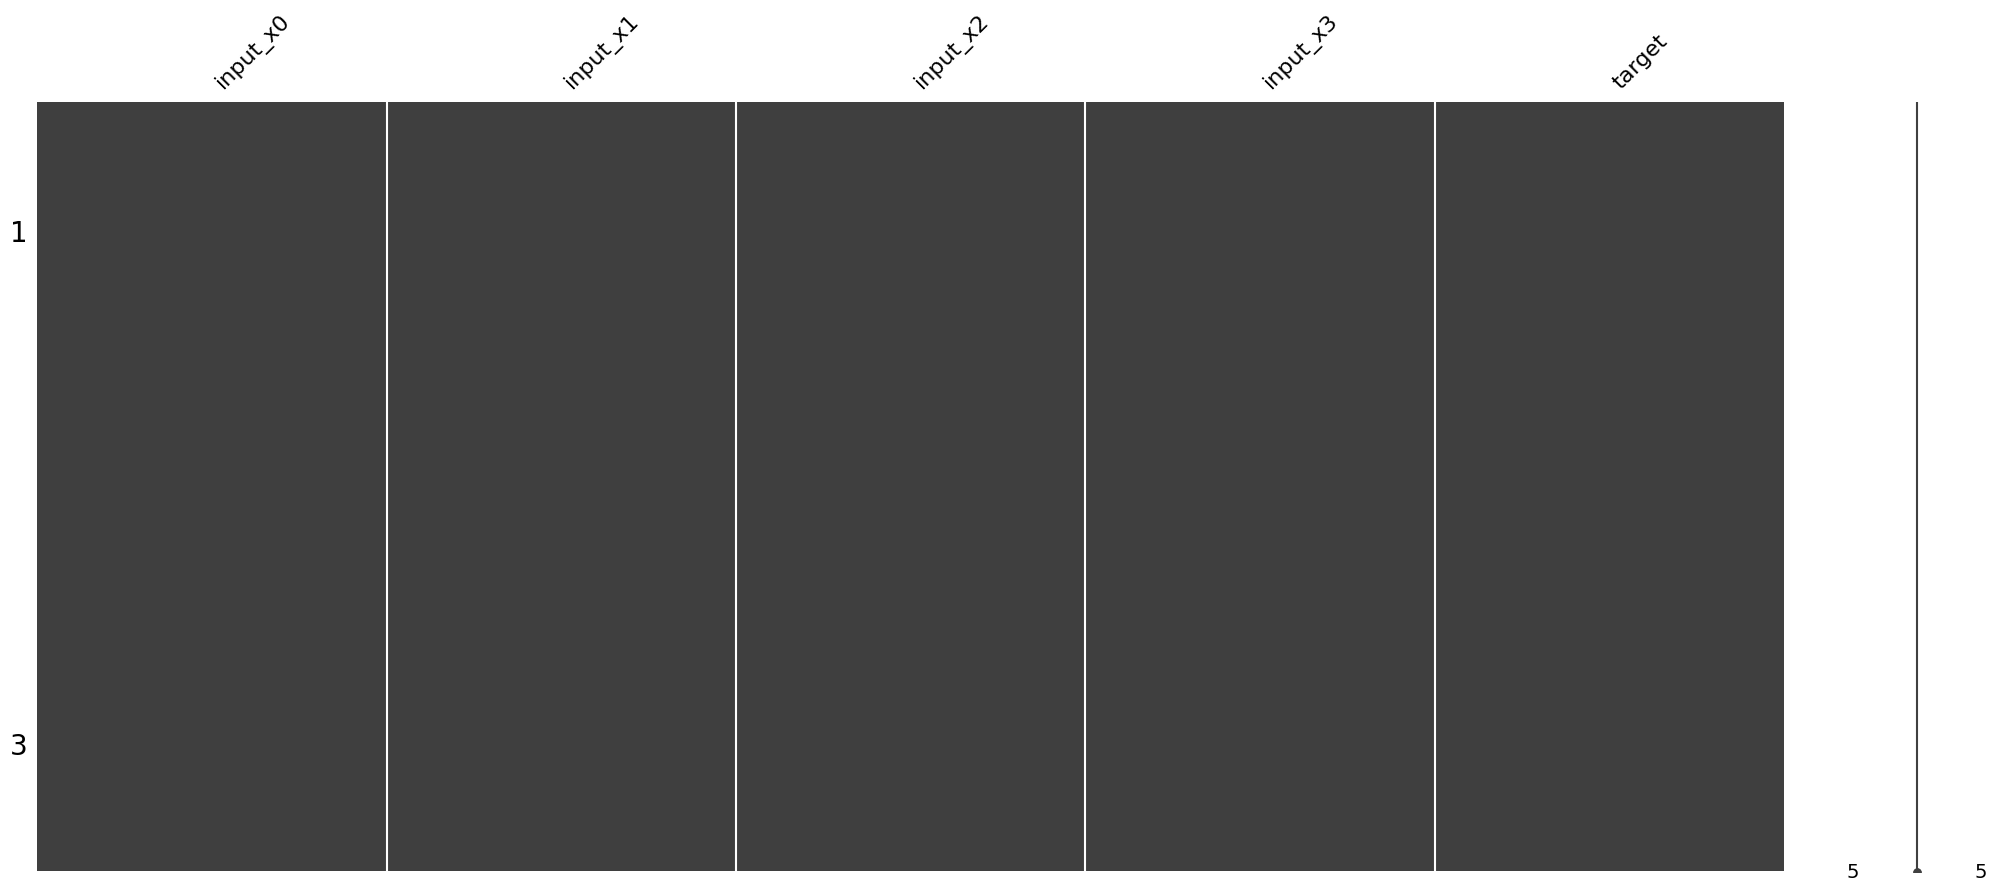

In [37]:
report.viz_missing()

### input tabular data의 분류 유형 분포

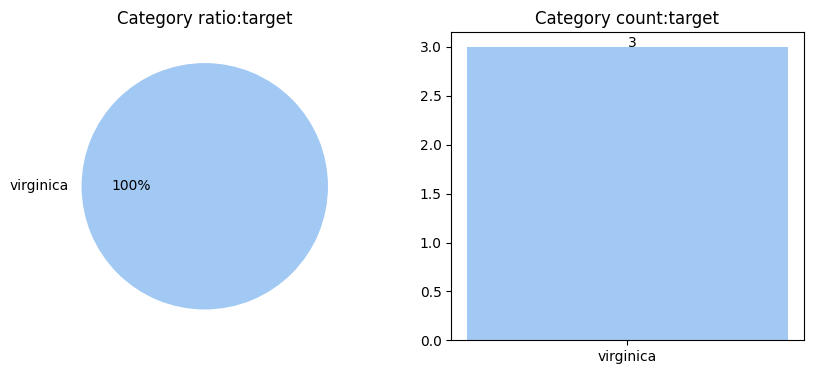

In [38]:
report.viz_class_distribution()

### input data의 수치형 항목에 대한 pairplot

- 분류 유형(색)에 따라 두 가지 수치형 항목에 대한 분포를 확인할 수 있습니다.

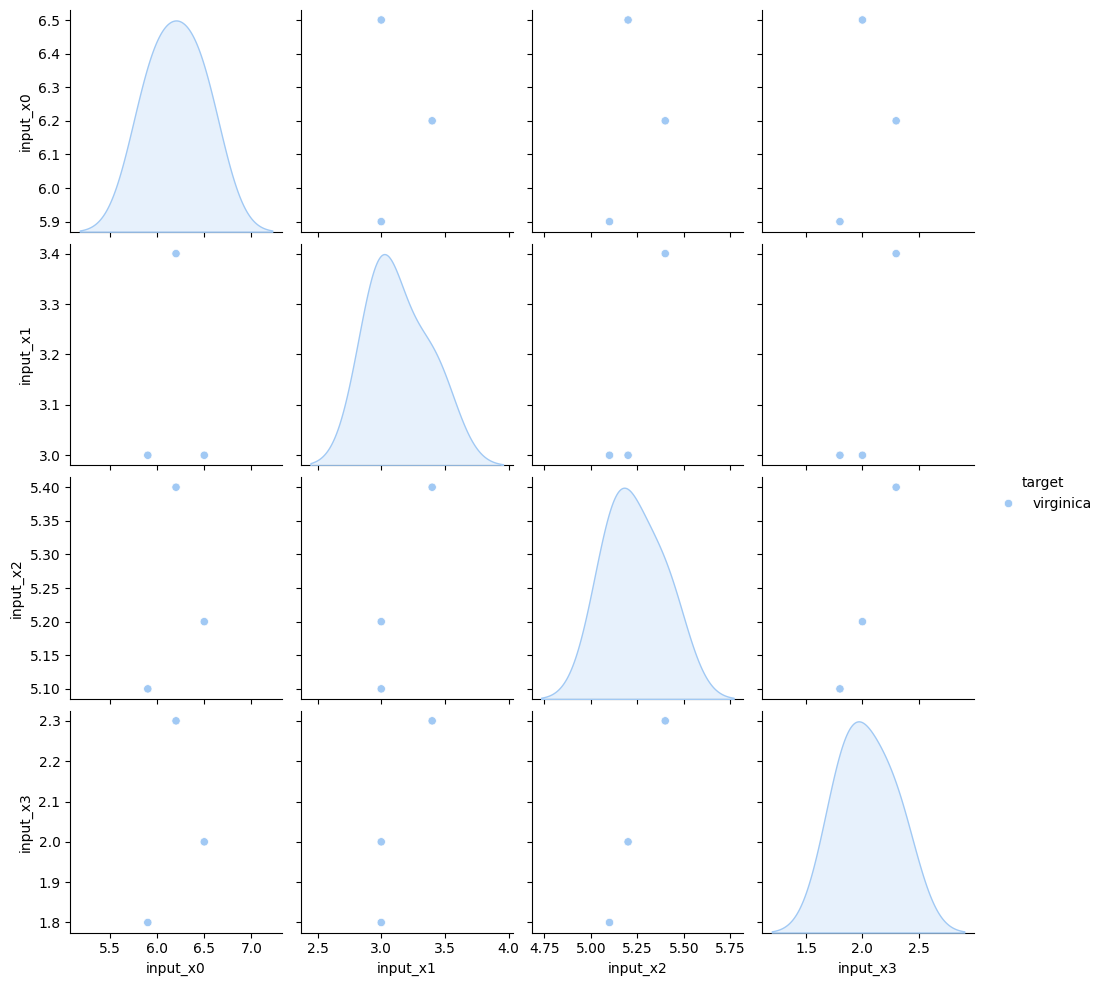

In [39]:
report.viz_pairplot()

### input tabular data의 수치형 데이터에 대한 boxplot

- 분류 유형(색)에 따라 수치형 데이터에 대한 분포를 boxplot 형태로 확인할 수 있습니다.
- 상단선은 최대값, 하단선은 최소값을 나타내며 중앙선은 중앙값을 나타냅니다.
- 상하단에서 벗어난 원형 데이터포인트는 정상분포를 가정할 때 이상치의 가능성이 있는 데이터입니다.
- 데이터 분포가 정상분포가 아닌 경우 이상치가 아니기 때문에 유의하여주시기 바랍니다.

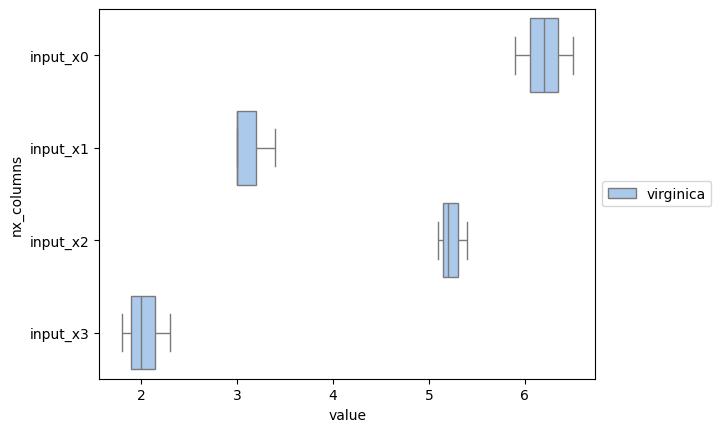

In [40]:
report.create_dataframe_viz()
report.viz_boxplot()

## preprocess asset
----

In [41]:
p_step = 'inference_1'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [42]:
args

{'handling_encoding_y_column': None,
 'handling_encoding_y': None,
 'handling_missing': 'dropna',
 'handling_scaling_x': 'none',
 'drop_duplicate_time': True,
 'load_train_preprocess': True}

In [43]:
print(df.shape)
df.head()

(3, 8)


,input_x0,input_x1,input_x2,input_x3,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan
0,6.5,3.0,5.2,2.0,6.5,3.0,5.2,2.0
1,6.2,3.4,5.4,2.3,6.2,3.4,5.4,2.3
2,5.9,3.0,5.1,1.8,5.9,3.0,5.1,1.8


### 전처리 이후 data의 통계량 변화

In [44]:
report.describe(px_columns, y_column)

,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan
count,3.00,3.000000,3.000000,3.000000
mean,6.20,3.133333,5.233333,2.033333
std,0.30,0.230940,0.152753,0.251661
min,5.90,3.000000,5.100000,1.800000
25%,6.05,3.000000,5.150000,1.900000
50%,6.20,3.000000,5.200000,2.000000
75%,6.35,3.200000,5.300000,2.150000
max,6.50,3.400000,5.400000,2.300000


### 전처리 이후 data의 분류 유형 분포

In [45]:
if py_column in df.columns:
    report.viz_class_distribution(py_column)

### 전처리 이후 data의 수치형 항목에 대한 pairplot

In [46]:
# 비교를 위해 전처리 전 pairplot 결과(확인을 위해서는 하단 # 부분을 삭제해주세요.)
# report.viz_pairplot(nx_columns, y_column)

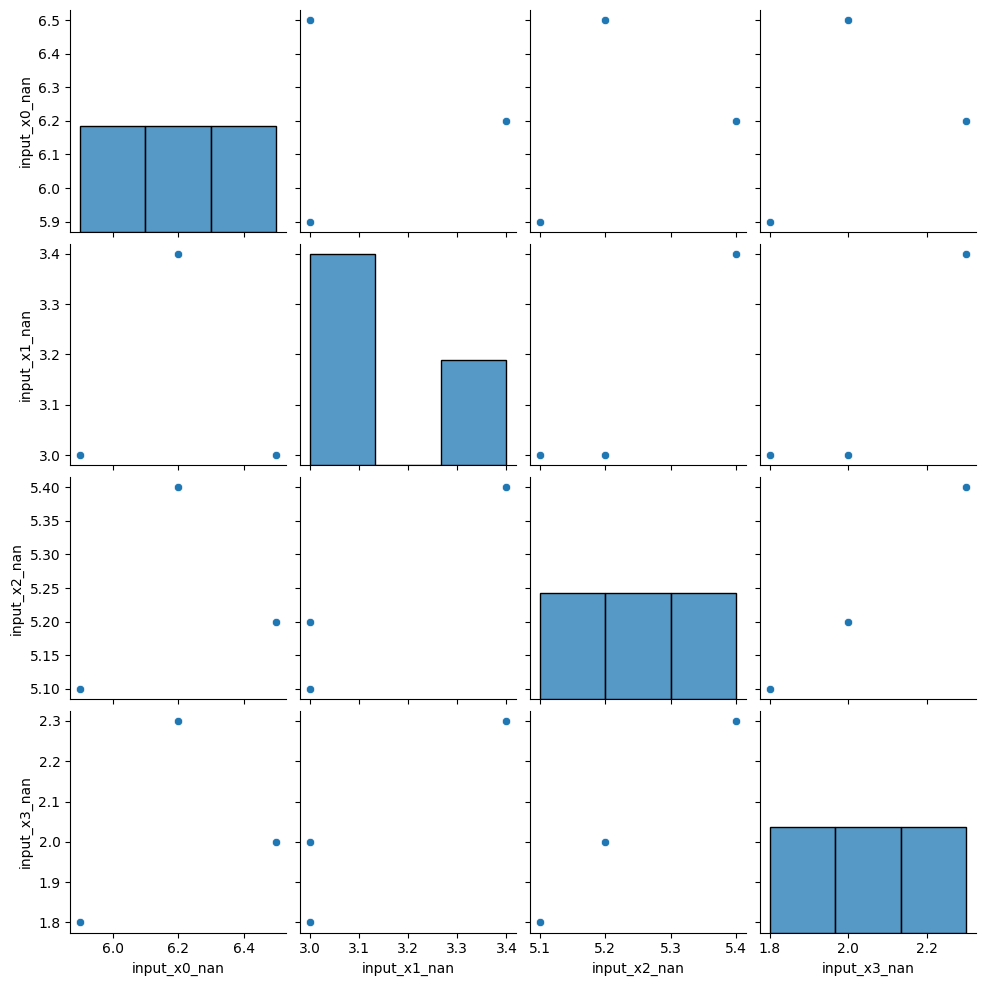

In [47]:
report.viz_pairplot(px_columns, y_column)

### 전처리 이후 data의 수치형 데이터에 대한 boxplot

In [48]:
# 확인용 전처리 전 boxplot 결과(확인을 위해서는 하단 # 부분을 삭제해주세요.)
# report.create_dataframe_viz(nx_columns, [y_column])
# report.viz_boxplot(y_column)

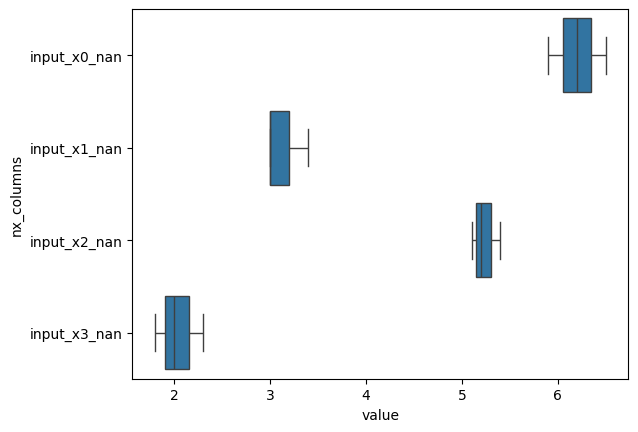

In [49]:
report.create_dataframe_viz(px_columns, [py_column])
report.viz_boxplot(py_column)

## TCR asset
----

In [50]:
p_step = 'inference_2'
data, args, config = report.set_data(p_step)
df = data['dataframe']

In [51]:
y_pred_column = 'pred_'+config['y_column']

In [52]:
args

{'model_type': 'classification', 'run_shapley': True}

### 분류 유형 별 성능 확인

In [53]:
if py_column in df.columns:
    report.viz_confusion_matrix()

In [54]:
if py_column in df.columns:
    report.classification_report()

### 분류 유형 별 최대 확률 확인

- 분류 유형 별 확률을 확인하여 모델이 얼마나 해당 데이터에 대해 확신을 가지고 분류했는지 알 수 있습니다.

In [55]:
# k_fold_split option으로 교차검증 과정에서 각 fold 별 확률을 확인할 수 있습니다.
# 확인을 위해서는 # 를 삭제 후 실행해주세요.
# df = report.viz_probability(k_fold_split=True)

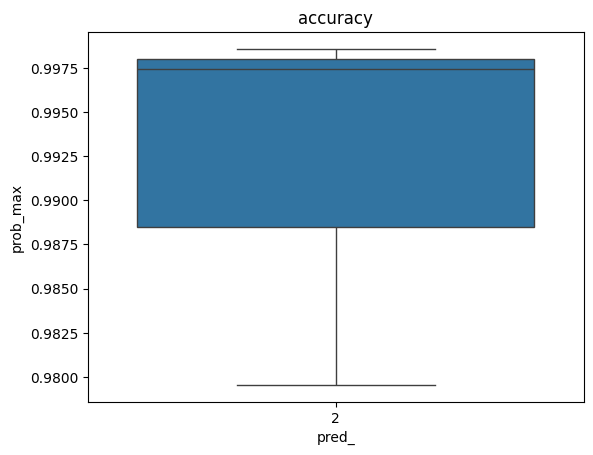

In [56]:
df = report.viz_probability(k_fold_split=False)

### 불확실한 데이터 확인

In [57]:
df.sort_values('prob_max').head(10)

,input_x0,input_x1,input_x2,input_x3,input_x0_nan,input_x1_nan,input_x2_nan,input_x3_nan,input_x0_nan_shapley,input_x1_nan_shapley,input_x2_nan_shapley,input_x3_nan_shapley,pred_,prediction_score,prob_0,prob_1,prob_2,prob_max
2,5.9,3.0,5.1,1.8,5.9,3.0,5.1,1.8,-0.126765,-0.224708,-1.22536,-1.186890,2,"[0.002881650240370401, 0.01756998171034897, 0....",0.002882,0.017570,0.979548,0.979548
1,6.2,3.4,5.4,2.3,6.2,3.4,5.4,2.3,-0.440786,0.347757,-1.22977,-1.205631,2,"[0.001161255681588001, 0.001383302688220785, 0...",0.001161,0.001383,0.997455,0.997455
0,6.5,3.0,5.2,2.0,6.5,3.0,5.2,2.0,-0.583817,-0.214722,-1.14936,-1.121901,2,"[0.0004328007534890143, 0.0009738324940228138,...",0.000433,0.000974,0.998593,0.998593


In [58]:
shap_cols = (df.columns[df.columns.str.contains('_shapley')]).tolist()

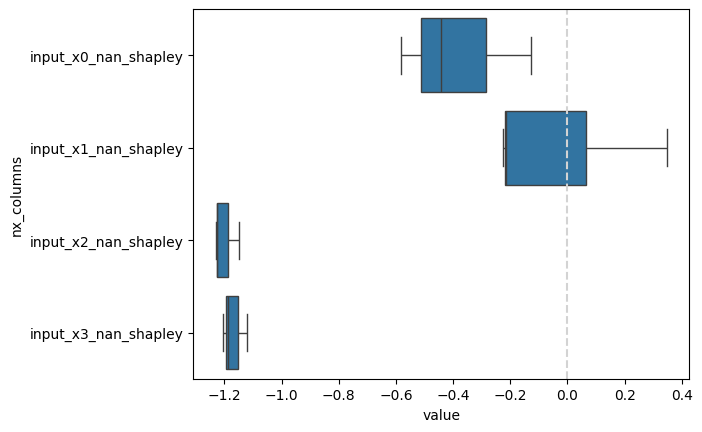

In [59]:
report.create_dataframe_viz(shap_cols, [config['y_column']])
report.viz_boxplot(cat_col=config['y_column'], vline=0)